# trial 마다 10s 히트맵 그리기 

In [1]:
import pandas as pd
from datetime import datetime

data = pd.read_excel('./clean_dataset/session_2_clean.xlsx') # stimulus 시점 표시된 clean data 가져오기.
data

,Unnamed: 0,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0
1,2,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
2,3,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
3,4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
4,5,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
...,...,...,...,...,...,...,...,...
66955,66990,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66956,66991,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66957,66992,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0
66958,66993,2022-07-17 22:18:39.238,-0.202515,-0.276469,-0.006862,0.571328,0.322866,0


In [2]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TimeStamp,Delta_AF8,Theta_AF8,Alpha_AF8,Beta_AF8,Gamma_AF8,stimulus
0,2022-07-17 22:14:17.780,0.041920,-0.090238,0.209607,0.834797,0.460706,0
1,2022-07-17 22:14:17.781,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
2,2022-07-17 22:14:17.784,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
3,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0
4,2022-07-17 22:14:17.785,-0.015349,-0.087206,0.206153,0.842231,0.453874,0


In [32]:
# 자극 시점 index 저장 (맨앞, 맨뒤 인덱스 포함)
point = []
point.append(0)
for i in range(len(data)) :
    if data['stimulus'][i] == 1:
        point.append(i)
point.append(len(data))
point

[0,
 7752,
 10572,
 13380,
 16212,
 19020,
 29520,
 32340,
 35149,
 37968,
 40776,
 51276,
 54084,
 56916,
 59724,
 62544,
 66960]

# whole heatmap 그리기

In [91]:
start_idx = point[15] # 수정 # 5 배수에서는 개수 맞춰주기 +2830
end_idx = point[15]+2830 # 수정
data_h = data[start_idx:end_idx]
data_alpha = data_h.drop(['stimulus','TimeStamp','Delta_AF8','Theta_AF8','Gamma_AF8','Beta_AF8',], axis = 1)
data_beta = data_h.drop(['stimulus','TimeStamp','Delta_AF8','Theta_AF8','Gamma_AF8','Alpha_AF8',], axis = 1)

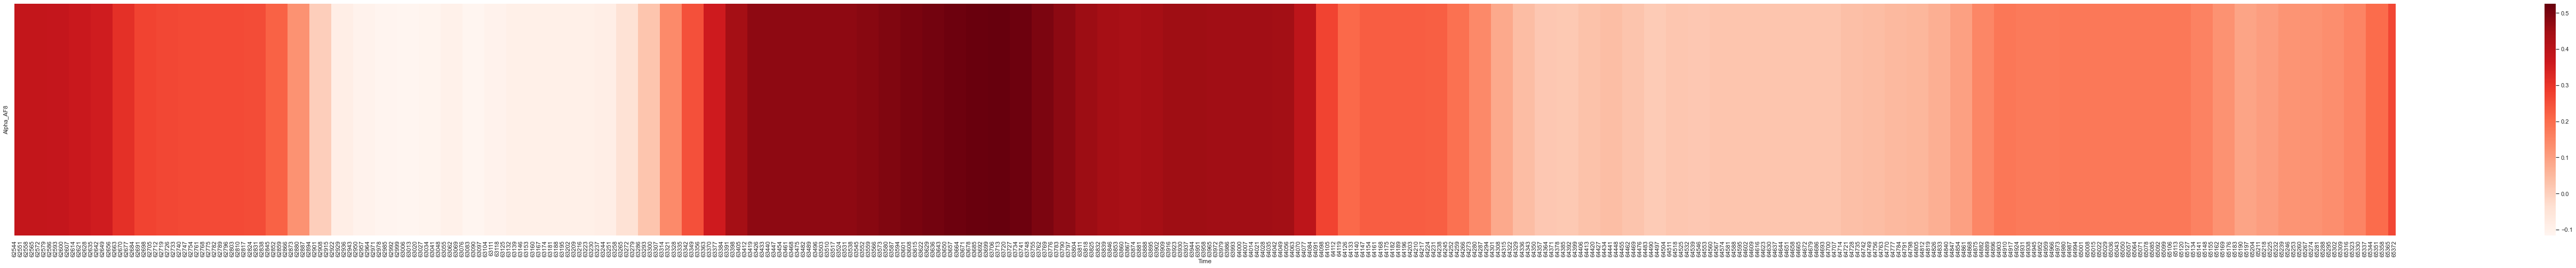

In [92]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_h_T = data_alpha.transpose()
# xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(100,8)})
# ax=sns.heatmap(data_h_T, cmap='Reds', annot=True,xticklabels=xtime)
ax=sns.heatmap(data_h_T, cmap='Reds', annot=False)
plt.xlabel("Time")

sfig = ax.get_figure()
sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/trial15_alpha.png',  orientation="landscape") # 수정

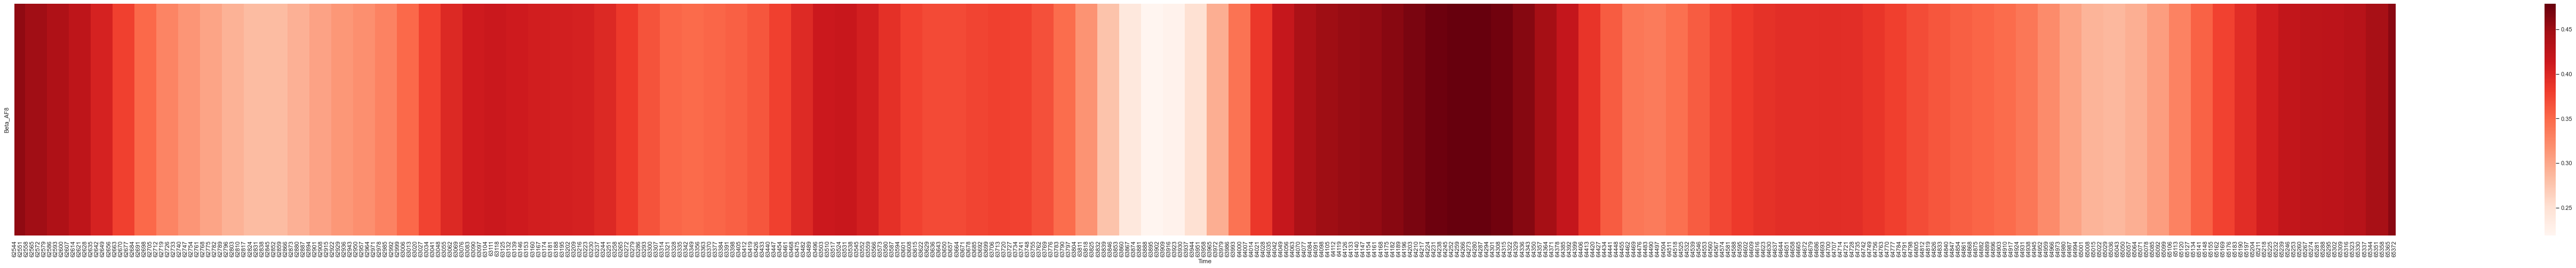

In [93]:
from pandas import Series, DataFrame


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_h_T = data_beta.transpose() 


# xtime = [0,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ', ' ',0.5,' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',' ',1]

sns.set(rc = {'figure.figsize':(100,8)})
# ax=sns.heatmap(data_h_T, cmap='Reds', annot=True,xticklabels=xtime)
ax=sns.heatmap(data_h_T, cmap='Reds', annot=False)
plt.xlabel("Time")

sfig = ax.get_figure()
sfig.savefig('./분석 시각화/알파베타 히트맵/session 2_AF8/trial15_beta.png',  orientation="landscape") # 수정

# index 번호로 timestamp 확인하기

In [38]:
data['TimeStamp'][7821]

'2022-07-17 22:14:48.291'

# 라인 그래프 그리기

No handles with labels found to put in legend.


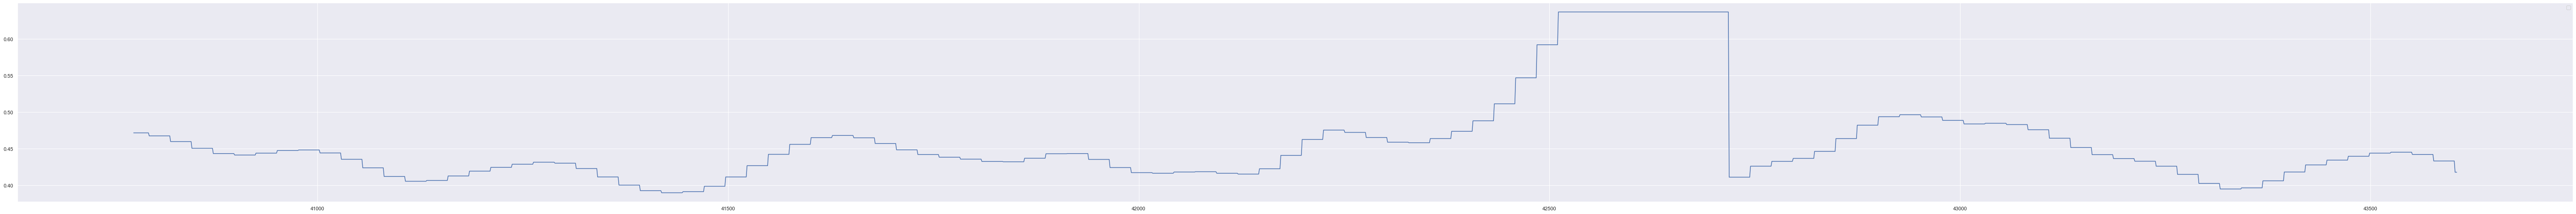

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize = (100,8))
plt.plot(data_beta)
plt.legend()
plt.show()